# 📺 IMDB MOVIES ANALYSIS

### Introduction
In this notebook, I will be analyzing the IMDB movies dataset. I will be using the [IMDB movies dataset](https://www.kaggle.com/datasets/ashpalsingh1525/imdb-movies-dataset). The dataset contains information on 9.660 movies such as the title, genre, score, actors and more.

Our goal is gain insights about the movies and answers key questions. We will be using the following libraries:
- Pandas
- Matplotlib
- Seaborn
- Numpy

### Table of Contents
 - Questions
 - Data cleaning
 - Exploratory Data Analysis
 - Conclusions

---

### Questions
- Q1: What is the relationship between the score and profit??
- Q2: Which genres are the most profitable?
- Q3: Which genres have the highest score?
- Q4: Does higher budget result in higher profit?
- Q5: Which Actors generate the highest profits?
- Q6: There are trends over time for profit and score. What are they?
---


In [161]:

### todo --> Analyze genres by relative not absolute --> sum / len(genres)



### Data Cleanning
I will install the libraries and import the data

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('data/imdb_movies.csv')

Now I will explore the data in order to get some basic information about the dataset.

In [ ]:
df.head(3)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


---

#### Handle Duplicates

In [165]:
df.duplicated().sum()

np.int64(0)

Therea are no duplicates so we can jump into the nexst step
#### Handle Missing Values

In [166]:
df.isna().sum() * 100 / len(df)

names         0.000000
date_x        0.000000
score         0.000000
genre         0.835135
overview      0.000000
crew          0.550206
orig_title    0.000000
status        0.000000
orig_lang     0.000000
budget_x      0.000000
revenue       0.000000
country       0.000000
dtype: float64

As the percentage of nulls is low, we can drop the rows with null values

In [167]:
df.dropna(subset=['crew', 'genre', 'country'], axis=0, inplace=True)


#### Droping columns
Now it's time to drop columns that don't help us with out analysis. We'll start by dropping the columns that are not needed for our analysis.

In [168]:
df.drop(['status','overview', 'orig_lang','orig_title', 'country'], axis=1, inplace=True)

#### Changing types
I will make some changes to the data types to make it easier to work with.

In [169]:
df['revenue'] = df['revenue'].astype(int)
df['budget_x'] = df['budget_x'].astype(int)

df['date_x'] = pd.to_datetime(df['date_x'])


#### Creating new columns
In this step I will calculate new features in order to make our dataset more useful.

In [170]:
df['profit'] = (df['revenue'] - df['budget_x']).astype(int)

---

### Exploratory Data Analysis

### Q1: What is the relationship between the score and profit?

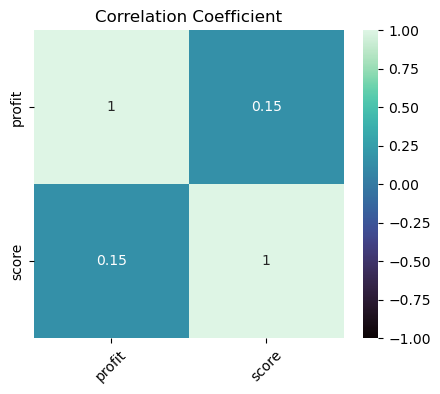

In [171]:
corr = df[[ 'profit', 'score']].corr()

plt.figure(figsize=(5,4))


cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True,vmin=-1, cmap='mako')

plt.xticks(rotation=45)
plt.title("Correlation Coefficient", size=12)

plt.show()

At first looks, we can't see a strong relationship between them

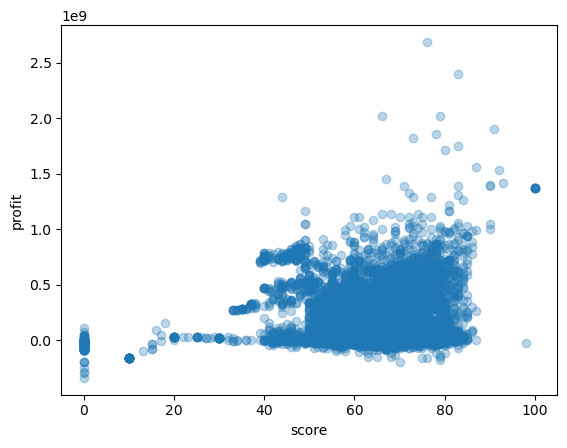

In [172]:
plt.scatter(df['score'], df['profit'] ,alpha=0.3, )
plt.xlabel('score')
plt.ylabel('profit')
plt.show()

In [179]:
df[['score', 'budget_x','revenue' ,'profit', ]].describe().astype(int)

,score,budget_x,revenue,profit
count,10052,10052,10052,10052
mean,63,64125276,251204923,187079647
std,12,56658516,276549495,241440377
min,0,1,0,-340000000
25%,59,14397627,27687812,5560382
50%,65,50000000,149328803,83729644
75%,71,104000000,416157754,314652888
max,100,460000000,2923706026,2686706026


In [182]:
df['budget_x'].min()

1

In [206]:


df[df['names'].str.startswith('Louis Tomlinson: All of Those Voices')]

,names,date_x,score,genre,crew,budget_x,revenue,profit
4483,Louis Tomlinson: All of Those Voices,2023-03-22,91.0,"Documentary, Music","Louis Tomlinson, Self, Oliver Wright, Louis’ P...",178800000,2081794005,1902994005


In [212]:
df.sort_values(by='revenue').head(10)
df[df['revenue'] == 1]

,names,date_x,score,genre,crew,budget_x,revenue,profit
4919,Sex and Death 101,2009-01-09,61.0,"Comedy, Romance, Drama","Simon Baker, Roderick Blank, Winona Ryder, Dea...",5,1,-4
10087,DADDY OWL!!!,2023-04-06,0.0,"Drama, Thriller","Marshall M, Judd, Trey M, Homeless Child, Jeff...",1,1,0


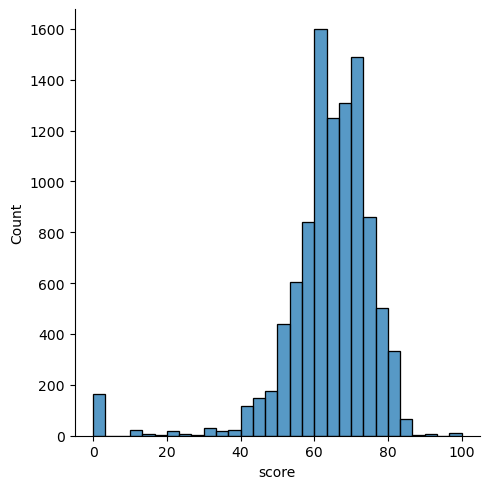

In [192]:
sns.displot(df, x='score' , bins=30)

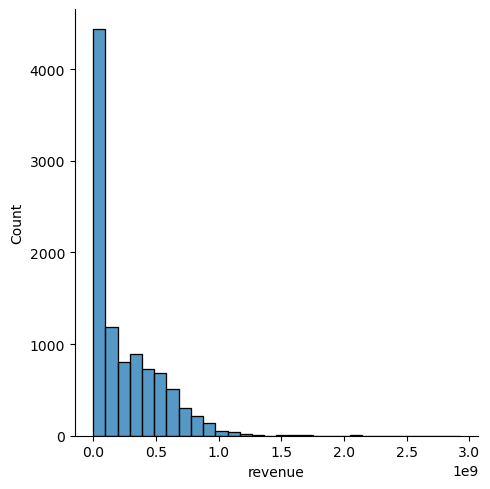

In [209]:
sns.displot(df, x='revenue' , bins=30)

<Axes: xlabel='revenue'>

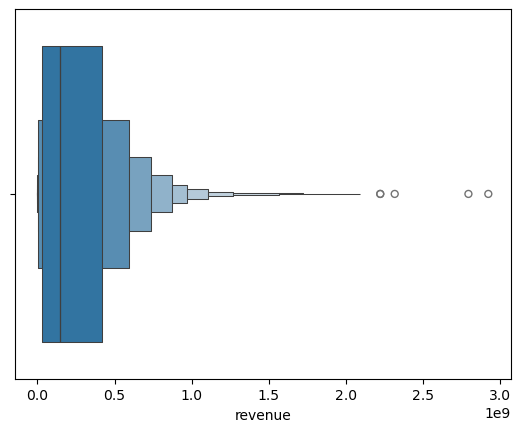

In [200]:
sns.boxenplot(x=df['revenue'])